In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

In [18]:
df=pd.read_csv('bank-additional-full.csv',)
#print(df.info)
print(df.columns)

df.index = [x for x in range(1, len(df.values)+1)]
df.index.name = 'id'

def ToBinary(value):
    if value=='yes':
        return 1
    elif value=='no':
        return 1
#print(df['age;'].head())
yes=df.y[df.y=='yes'].apply(ToBinary)
no=df.y[df.y=='no'].apply(ToBinary)
print(len(yes))
#print(yes)
print(len(no))

#“nr. employed”, which is the number of employees in the bank, has positive effect for turning people to subscribe the term deposit. 
#cons.price.idx consumer price index was the most important feature
X=df[['age', 'job','marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]

df['marital']=df['marital'].astype('category').cat.codes
df['loan']=df['loan'].astype('category').cat.codes
df['default']=df['default'].astype('category').cat.codes
#print(df['marital'])
X=df[['age','nr.employed','marital','loan','cons.price.idx','default']]

print(X.head())

y=df['y'].astype('category').cat.codes

input_cols=np.array(np.arange(0,20))
output_cols=np.array([21])

def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
4640
36548
    age  nr.employed  marital  loan  cons.price.idx  default
id                                                          
1    56       5191.0        1     0          93.994        0
2    57       5191.0        1     0          93.994        1
3    37       5191.0        1     0          93.994        0
4    40       5191.0        1     0          93.994        0
5    56       5191.0        1     2          93.994        0


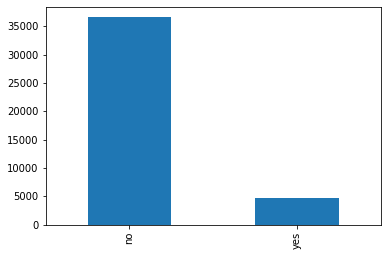

In [19]:

df['y'].value_counts().plot(kind='bar')

plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


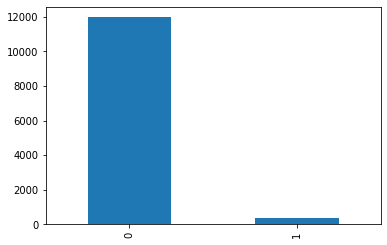

In [20]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lr=LogisticRegression(C=.01)

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='bar')
plt.show()



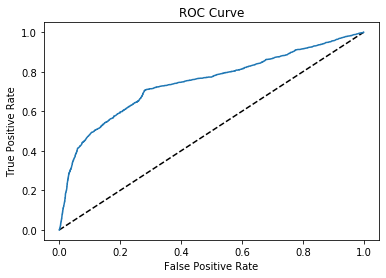

Log Loss is %s 0.3052485017605


In [21]:
y_pred_prob=lr.predict_proba(X_test)[:,1]
fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value
loss = log_loss(y_test, y_pred_prob)
print("Log Loss is %s",loss)

In [22]:
print("Accuracy is %s",lr.score(X_test,y_test)*100)

Accuracy is %s 88.7836853605244


In [23]:
print("Co efficients %s",lr.coef_)
print("Y intercept %s",lr.intercept_)

Co efficients %s [[ 0.00564764 -0.01214207  0.08255839  0.00754153  0.64248046 -0.08794113]]
Y intercept %s [0.00908801]


In [24]:
def make_meshgrid(x, y, h=.02):

    """Create a mesh of points to plot in



    Parameters

    ----------

    x: data to base x-axis meshgrid on

    y: data to base y-axis meshgrid on

    h: stepsize for meshgrid, optional



    Returns

    -------

    xx, yy : ndarray

    """

    x_min, x_max = x.min() - 1, x.max() + 1

    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),

                         np.arange(y_min, y_max, h))

    return xx, yy
def plot_contours(ax, clf, xx, yy, proba=False, transformation=None, **params):

    """Plot the decision boundaries for a classifier.



    Parameters

    ----------

    ax: matplotlib axes object

    clf: a classifier

    xx: meshgrid ndarray

    yy: meshgrid ndarray

    params: dictionary of params to pass to contourf, optional

    """



    X = np.c_[xx.ravel(), yy.ravel()]

    if transformation is not None:

        X = transformation(X)

        # xx = np.reshape(X[:,0], xx.shape)

        # yy = np.reshape(X[:,1], yy.shape)





    if proba:

        if hasattr(clf, 'predict_proba'):

            Z = clf.predict_proba(X)[:,-1]

            Z = Z.reshape(xx.shape)

            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)

            ax.contour(xx, yy, Z, levels=[0.5])

        else:

            Z = clf.decision_function(X)

            Z = Z.reshape(xx.shape)

            out = ax.contourf(xx, yy, Z, **params)

    else:

        Z = clf.predict(X)

        Z = Z.reshape(xx.shape)

        out = ax.contourf(xx, yy, Z, **params)

    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, transformation=None): # assumes classifier "clf" is already fit

    X0, X1 = X[:, 0], X[:, 1]

    xx, yy = make_meshgrid(X0, X1)



    if ax is None:

        plt.figure()

        ax = plt.gca()

        show = True

    else:

        show = False



    # can abstract some of this into a higher-level function for learners to call

    #plot_contours(ax, clf, xx, yy, proba=proba, transformation=transformation, cmap=plt.cm.coolwarm, alpha=0.8)

    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)

    labels = np.unique(y)

    if len(labels) == 2:

        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')

        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')

    else:

        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)



    ax.set_xlim(xx.min(), xx.max())

    ax.set_ylim(yy.min(), yy.max())

#     ax.set_xlabel(data.feature_names[0])

#     ax.set_ylabel(data.feature_names[1])

    if ticks:

        ax.set_xticks(())

        ax.set_yticks(())

#     ax.set_title(title)

    if show:

        plt.show()

    else:

        return ax

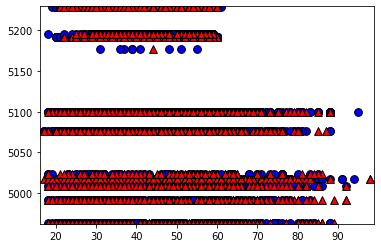

In [25]:
#print (X.to_numpy())
plot_classifier(X.to_numpy(),y.to_numpy(),lr)

In [26]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

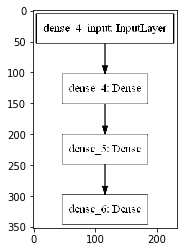

In [27]:
model=Sequential()

model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping_monitor=EarlyStopping(patience=3)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])


plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [28]:
#https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)

model.fit(X_scaled, y,callbacks=[early_stopping_monitor],  epochs=10)

#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)

#def create_baseline():
# create model
#    model = Sequential()
#    model.add(Dense(6, input_dim=6, activation='relu'))
#    model.add(Dense(1, activation='sigmoid'))
    # Compile model
#    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model
# evaluate model with standardized dataset
#estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Epoch 1/10
41188/41188 [==============================] - 1s 23us/step - loss: 0.3267 - accuracy: 0.8870
Epoch 2/10
 5344/41188 [==>...........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8894

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


41188/41188 [==============================] - 1s 20us/step - loss: 0.2967 - accuracy: 0.8865
Epoch 3/10
41188/41188 [==============================] - 1s 21us/step - loss: 0.2952 - accuracy: 0.8868
Epoch 4/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2946 - accuracy: 0.8864
Epoch 5/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2943 - accuracy: 0.8866
Epoch 6/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2939 - accuracy: 0.8856
Epoch 7/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2937 - accuracy: 0.8862
Epoch 8/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2934 - accuracy: 0.8855
Epoch 9/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2931 - accuracy: 0.8856
Epoch 10/10
41188/41188 [==============================] - 1s 20us/step - loss: 0.2930 - accuracy: 0.8858


1875
39313


<function matplotlib.pyplot.show(*args, **kw)>

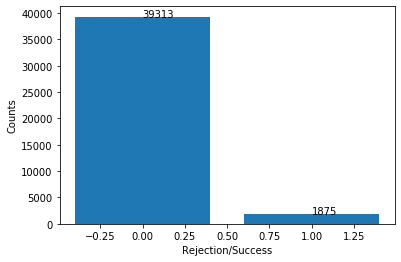

In [33]:
y_pred=model.predict(X_scaled)
buffer=y_pred.flatten()
#print(buffer)
yes=buffer[buffer>=.5]
no=buffer[buffer<.5]
print(len(yes))
print(len(no))

counts=[len(no),len(yes)]
plt.bar(range(2),counts)
plt.ylabel("Counts")
plt.xlabel("Rejection/Success")

plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show
